# 1-Déploiement de l'environnement

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mp

# 2- Sources de données : manipulations

In [2]:
c_i=pd.read_csv('Base de données/credit_immo/credit_immo.csv')

c_i.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


In [3]:
c_i2=pd.read_json('Base de données/credit_immo/credit_immo.json')

c_i.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


In [4]:
c_i3=pd.read_excel('Base de données/credit_immo/credit_immo.xls')

c_i.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


In [5]:
varlist = ("taux_de_ventes", "croissance_vente","ratio_benefice", "ratio_perte")

n1 = 1
n2 = 100


df = pd.DataFrame(np.random.randn(6, 4), columns = list(varlist))

print(df)

   taux_de_ventes  croissance_vente  ratio_benefice  ratio_perte
0       -1.100275         -1.102332        0.355187    -1.373386
1       -0.055983          2.234475        1.142957    -0.017992
2        0.783245          0.318701        0.295417    -1.542193
3       -0.091734          0.118169        0.097066    -0.614905
4        0.524598          2.017780       -0.483443    -0.649777
5       -0.162413         -0.737232       -0.454586     1.922646


In [6]:
df2 = df.reindex([0, 1, 2, 3, 4, 5, 6, 7])

In [7]:
df2.isnull()

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,True,True,True,True
7,True,True,True,True


In [8]:
df2.fillna(0)

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,-1.100275,-1.102332,0.355187,-1.373386
1,-0.055983,2.234475,1.142957,-0.017992
2,0.783245,0.318701,0.295417,-1.542193
3,-0.091734,0.118169,0.097066,-0.614905
4,0.524598,2.017780,-0.483443,-0.649777
5,-0.162413,-0.737232,-0.454586,1.922646
6,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000


In [9]:
df =df2.dropna()
df

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,-1.100275,-1.102332,0.355187,-1.373386
1,-0.055983,2.234475,1.142957,-0.017992
2,0.783245,0.318701,0.295417,-1.542193
3,-0.091734,0.118169,0.097066,-0.614905
4,0.524598,2.017780,-0.483443,-0.649777
5,-0.162413,-0.737232,-0.454586,1.922646


## 3 - Traitement des données

In [10]:
from sklearn.impute import SimpleImputer
#transformer les valeurs manquantes en moyenne
c_i_num = c_i.select_dtypes(include='number')

imputer = SimpleImputer().fit(c_i_num)

c_i[c_i_num.columns] = imputer.transform(c_i_num)

c_i.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45.0,CDI,40000.0,4000.0,M,0.3,3.000000,OUI
1,VANESSA,5.0,28.0,CDI,30500.0,1320.0,M,0.1,0.000000,OUI
2,TARCISSE,0.0,55.0,CDI,28000.0,40000.0,C,0.0,0.000000,NON
3,TIBAULT,4.0,23.0,CDD,15000.0,0.0,M,0.1,1.333333,OUI
4,GILES,0.0,33.0,CDD,27000.0,3000.0,C,0.1,2.000000,NON


In [11]:
#encoder les valeurs catégoriques

from sklearn.preprocessing import LabelEncoder, StandardScaler 

c_i_cat = c_i.select_dtypes(include='object').columns

for i in c_i_cat :
    
    c_i[i] = LabelEncoder().fit_transform(c_i[i])

c_i.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,18,3.0,45.0,1,40000.0,4000.0,1,0.3,3.000000,1
1,16,5.0,28.0,1,30500.0,1320.0,1,0.1,0.000000,1
2,14,0.0,55.0,1,28000.0,40000.0,0,0.0,0.000000,0
3,15,4.0,23.0,0,15000.0,0.0,1,0.1,1.333333,1
4,7,0.0,33.0,0,27000.0,3000.0,0,0.1,2.000000,0


In [12]:

from sklearn.model_selection import train_test_split

#fractionnement des données pour le test





In [13]:
X=c_i.iloc[:,1:-1]
X

,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge
0,3.000000,45.0,1,40000.0,4000.0,1,0.3,3.000000
1,5.000000,28.0,1,30500.0,1320.0,1,0.1,0.000000
2,0.000000,55.0,1,28000.0,40000.0,0,0.0,0.000000
3,4.000000,23.0,0,15000.0,0.0,1,0.1,1.333333
4,0.000000,33.0,0,27000.0,3000.0,0,0.1,2.000000
5,0.000000,41.0,3,40000.0,1000.0,1,0.0,4.000000
6,-1.000000,29.0,1,50000.0,3000.0,0,0.0,0.000000
7,-3.000000,24.0,3,29000.0,5000.0,0,0.0,0.000000
8,1.444444,26.0,1,44000.0,0.0,1,0.1,1.000000
9,3.000000,37.0,1,45800.0,2000.0,1,0.2,2.000000


In [14]:
Y=c_i.iloc[:,-1:]
Y

,Solvable
0,1
1,1
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [15]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
#mise à l'échelle des features
scaled_features = StandardScaler().fit_transform(c_i.values)
print(scaled_features)

[[ 1.64316767  0.58477783  0.69964472 -0.16929979 -0.15939982 -0.34223088
   0.67936622  1.24354001  1.32637071  1.05409255]
 [ 1.2780193   1.33663503 -0.77738303 -0.16929979 -0.61392855 -0.45846885
   0.67936622 -0.33161067 -1.06109657  1.05409255]
 [ 0.91287093 -0.54300798  1.56848458 -0.16929979 -0.73354137  1.21917467
  -1.47196014 -1.11918601 -1.06109657 -0.9486833 ]
 [ 1.09544512  0.96070643 -1.21180295 -1.24153183 -1.35552804 -0.51572038
   0.67936622 -0.33161067  0.          1.05409255]
 [-0.36514837 -0.54300798 -0.3429631  -1.24153183 -0.7813865  -0.38560325
  -1.47196014 -0.33161067  0.53054828 -0.9486833 ]
 [-1.2780193  -0.54300798  0.35210878  1.97516427 -0.15939982 -0.47234801
   0.67936622 -1.11918601  2.12219314 -0.9486833 ]
 [ 0.54772256 -0.91893658 -0.69049904 -0.16929979  0.31905146 -0.38560325
  -1.47196014 -1.11918601 -1.06109657 -0.9486833 ]
 [-0.18257419 -1.67079379 -1.12491897  1.97516427 -0.68569624 -0.2988585
  -1.47196014 -1.11918601 -1.06109657 -0.9486833 ]
 

# 4 - Visualisation de données

In [17]:
m_t=pd.read_csv('./Base de données/Montant_temps.csv')

m_t.head()

,Montant_du_capitale,Temps
0,1,5
1,12,6
2,13,7
3,2,8
4,3,9


In [18]:
# Abscisse = x = Temps, Ordonnées = y = Montant_du_capitale

X = m_t.iloc[:,1:]
Y = m_t.iloc[:,:1]
print("X= ",X.head(2))
print("Y= ",Y.head(2))

X=     Temps
0      5
1      6
Y=     Montant_du_capitale
0                    1
1                   12


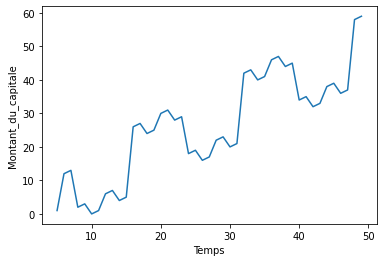

In [19]:
import matplotlib.pyplot as plt

plt.plot(X,Y)
# Nommer les axes 
plt.xlabel("Temps")
plt.ylabel("Montant_du_capitale")
# affiche la figure a l'ecran
plt.show()

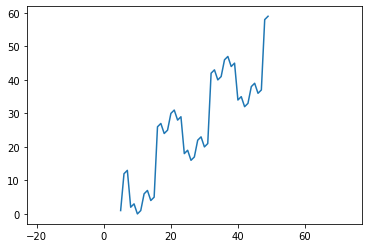

In [20]:
plt.plot(X, Y)
plt.axis("equal")

plt.show()

#### 4.1 Rajoutez du style à vos graphiques

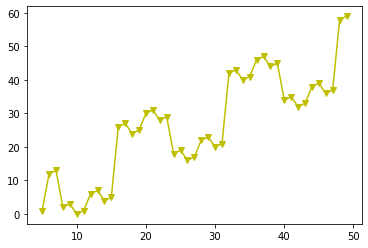

In [21]:
plt.plot(X,Y, "y-v")

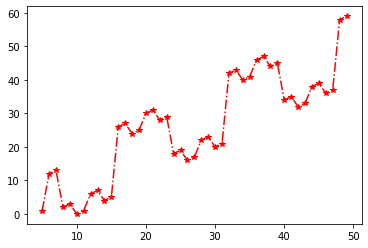

In [22]:
import matplotlib
plt.plot(X,Y, "r-.*")
matplotlib.rcParams['axes.facecolor'] = 'lightblue'

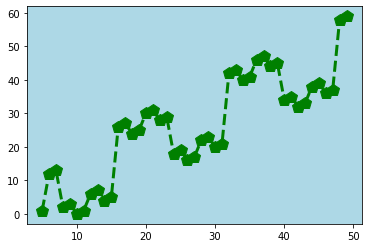

In [23]:
plt.plot(X,Y,color='green', marker='p', linestyle='dashed',
     linewidth=3, markersize=12)

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

#### 4.2 - Visualisation de données sous forme de nuage de points

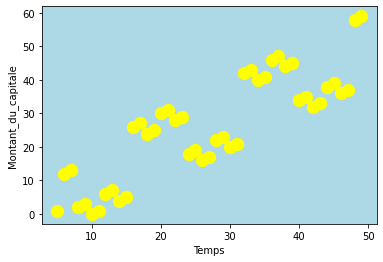

In [24]:
plt.scatter(X,Y, s=150, c='yellow')
plt.xlabel("Temps")
plt.ylabel("Montant_du_capitale")
# plt.savefig('ScatterPlot_01.png')
plt.show()

### 5 - Analyse de données

#### 5.1 - Mesure de tendance centrale

In [25]:
import pandas as pd
import statistics
import numpy as np
# import scipy as sp
# import matplotlib as mp
# import matplotlib.pyplot as plt

In [26]:
tc = pd.read_csv("./Base de données/tendance_centrale.csv")
tc.head()

,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50


In [27]:
#médiane arithmétique (moins sensible que la moyenne aux valeurs aberrantes)
tctc= tc[1:5]

medi = tctc.groupby("Age")["Rating"].median()
print(medi)

Age
30    3.50
53    5.59
55    3.98
59    3.54
Name: Rating, dtype: float64


In [28]:
tc.describe()

,Age,Rating
count,17.000000,17.000000
mean,45.647059,4.438824
std,10.723462,0.800390
min,30.000000,3.500000
25%,34.000000,3.800000
50%,49.000000,4.300000
75%,53.000000,4.800000
max,59.000000,5.980000


In [29]:
print("3) Mode principal Age:", statistics.mode(tc["Age"]))
print("3) Mode principal Rating :", statistics.mode(tc["Rating"]))


3) Mode principal Age: 53
3) Mode principal Rating : 3.78


#### 5.2 Mesure de la variance

In [30]:
import statistics
statistics.variance(tc["Rating"])


0.6406235294117649

In [31]:
statistics.variance(tc["Age"])

114.99264705882352

In [32]:
np.var(tc["Age"])


108.22837370242213

In [33]:
np.var(tc["Rating"])

0.6029397923875436

In [55]:
print(tc)

           Nom  Age  Rating
0      ANATOLE   55    4.53
1     Vincent    59    3.54
2      Brenda    55    3.98
3    Philippe    53    5.59
4      Michel    30    3.50
5     Tillier    59    4.90
6   Blanchard    53    3.80
7        perez   34    3.78
8        théo    40    5.98
9     cyprien    30    4.80
10   manuella    53    4.30
11   LEGGERET    49    3.95
12       perez   34    3.78
13    sestre     40    5.98
14      Fazal    30    4.80
15      Donald   53    4.30
16     Estelle   49    3.95


In [56]:
    from scipy.stats import f_oneway  
    
Rating = [4.53, 3.98, 5.59, 3.50, 4.90, 3.80, 3.78, 5.98, 4.80, 4.30, 3.95, 3.78, 5.98, 4.80, 4.30, 3.95]
Age = [55, 59, 55, 53, 30, 59, 53, 34, 40, 30, 53, 49, 34, 40, 30, 53, 49 ]
    

anova = f_oneway(Age, Rating)
anova
# Si pvalue > 0,05 = les moyennes sont similaires, donc les groupes appartiennes à la même population
# Si pvalue < 0,05, les moyennes sont diff, donc les gp n'appartienne pas à la même pop
# Je n'ai pas trouvé seul cette solution et je ne comprend pas pourquoi on appelle anova alors que la variance est plus simple...
# Heureusement que l'on commence l'année et qu'un niveau bac est suffisant, vivement la mécanique quantique le mois prochain...

F_onewayResult(statistic=233.9906698703309, pvalue=5.420984437736717e-16)

In [ ]:
pvalue=5.420984437736717e-16

#### 5.3 - Analyse de corrélations

In [35]:
iris = pd.read_csv("./Base de données/iris.csv")
iris.head()

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal,espece
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
iris.corr()

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal
longueur_sepal,1.000000,-0.117570,0.871754,0.817941
largeur_sepal,-0.117570,1.000000,-0.428440,-0.366126
longueur_petal,0.871754,-0.428440,1.000000,0.962865
largeur_petal,0.817941,-0.366126,0.962865,1.000000


In [37]:
iris.longueur_sepal.corr(iris.longueur_petal)      #corrélation positive supérieur à 0,8

0.8717537758865831

In [38]:
iris.longueur_sepal.corr(iris.largeur_sepal)         #corrélation négative proche de 0, variables décorrélées

-0.11756978413300208

In [39]:
iris.largeur_petal.corr(iris.largeur_sepal)

-0.3661259325364393

In [40]:
iris.longueur_petal.corr(iris.largeur_sepal)

-0.4284401043305395

###### 5.3.2 - Analyse graphique 

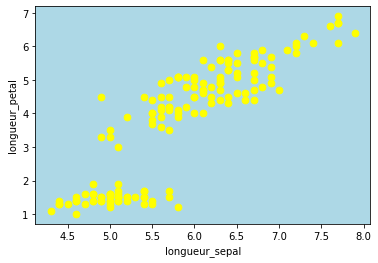

In [41]:

import matplotlib

X = iris.iloc[:,0]
Y = iris.iloc[:,2]

plt.scatter(X,Y, s=45, c='yellow')
plt.xlabel("longueur_sepal")
plt.ylabel("longueur_petal")
#plt.savefig('ScatterPlot_01.png')
plt.show()

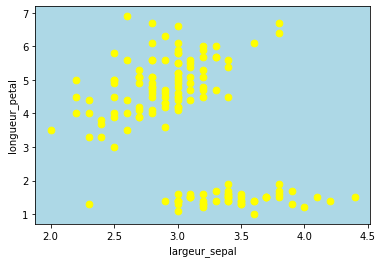

In [42]:
X = iris.iloc[:,1]
Y = iris.iloc[:,2]

plt.scatter(X,Y, s=45, c='yellow')
plt.xlabel("largeur_sepal")
plt.ylabel("longueur_petal")
#plt.savefig('ScatterPlot_02.png')
plt.show()

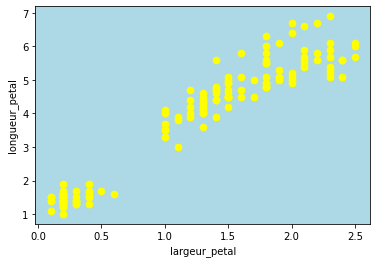

In [43]:
X = iris.iloc[:,3]
Y = iris.iloc[:,2]

plt.scatter(X,Y, s=45, c='yellow')
plt.xlabel("largeur_petal")
plt.ylabel("longueur_petal")
#plt.savefig('ScatterPlot_03.png')
plt.show()

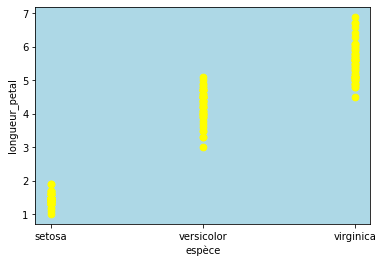

In [44]:
X = iris.iloc[:,4]
Y = iris.iloc[:,2]

plt.scatter(X,Y, s=45, c='yellow')
plt.xlabel("espèce")
plt.ylabel("longueur_petal")
#plt.savefig('ScatterPlot_04.png')
plt.show()

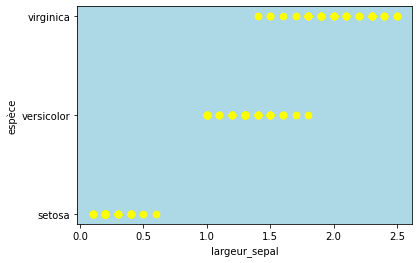

In [45]:
X = iris.iloc[:,3]
Y = iris.iloc[:,4]

plt.scatter(X,Y, s=45, c='yellow')
plt.xlabel("largeur_sepal")
plt.ylabel("espèce")
#plt.savefig('ScatterPlot_05.png')
plt.show()

##### 5.3.3 - Corrélation de Pearson

In [46]:
from scipy.stats.stats import pearsonr
import matplotlib as plt

Var1 = ["longueur_petal"]
Var2 = ["longueur_sepal"]
pearsonr(Var1, Var2)


ValueError: x and y must have length at least 2.

In [50]:
corr, _ = pearsonr(X, Y)
round(corr,2)

0.87

In [51]:
X = iris.iloc[:,0]
Y = iris.iloc[:,2]
plt.scatter(X,Y)

plt.xlim(-10,10)

plt.title("Coefficient de Pearson")

plt.xlabel('Longueur sépale')
plt.ylabel('Longueur pétale')

# plt.savefig("Pearson_Correlation_coefficient_01.png", bbox_inches='tight')

plt.show()

AttributeError: 'str' object has no attribute 'iloc'

In [54]:
iris = ["./Base de données/iris.csv"]
X = iris.iloc[:,0]
Y = iris.iloc[:,1]
plt.scatter(X,Y)

plt.xlim(-10,10)

plt.title("Coefficient de Pearson")

plt.xlabel('Longueur sépale')
plt.ylabel('Longueur pétale')

# plt.savefig("Pearson_Correlation_coefficient_01.png", bbox_inches='tight')

plt.show()

AttributeError: 'list' object has no attribute 'iloc'